In [2]:
# Import necessary libraries
import pandas as pd
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

In [3]:
# Load data 
df = pd.read_excel('Thesis_V6.xlsx')

In [5]:
# Removing any rows with NaN values
df.dropna(inplace=True)

In [6]:
# Extract values from the columns
DEM = df['DEM']
FAPR = df['FAPAR (Fraction of absorbed Photosynthetic Active Radiation)']
depth_watertable = df['Depth to water table']
TWI = df['Topogrpahic wetness index']

slope = df['Slope']  
depth_bedrock = df['Depth to bedrock']


recharge_fraction = df['Recharge fraction']

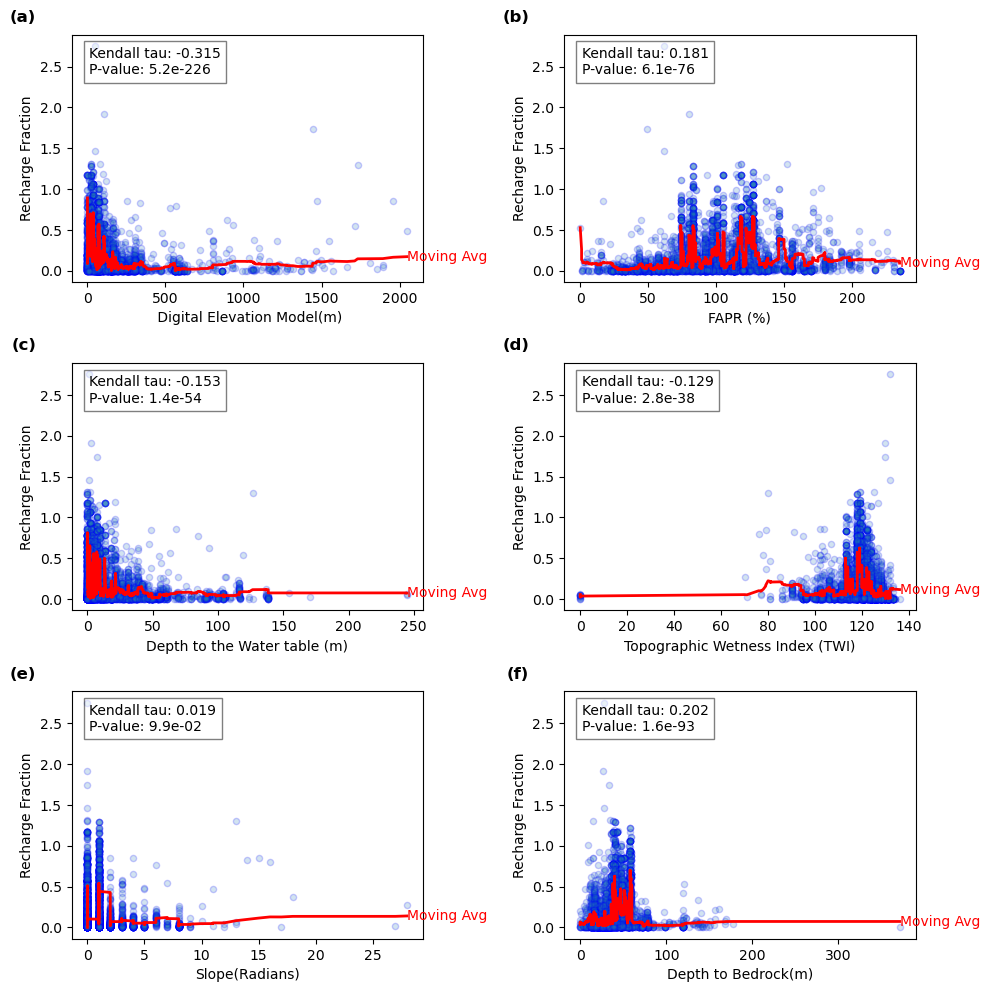

In [8]:
# Create a 3x2 subplot layout for 6 variables
fig, axes = plt.subplots(3, 2, figsize=(10, 10))  
axes = axes.flatten()  
# Define plot data and labels
plot_data = [
    (DEM, ' Digital Elevation Model(m)', '(a)'),
    (FAPR, 'FAPR (%)', '(b)'),

    (depth_watertable, 'Depth to the Water table (m)', '(c)'),
    (TWI, 'Topographic Wetness Index (TWI)', '(d)'),
    (slope, 'Slope(Radians)', '(e)'),
    (depth_bedrock, 'Depth to Bedrock(m)', '(f)'),
]

# Moving Average Window Size
window_size = 50

# Loop through data and create scatter plots
for i, (x_data, xlabel, subplot_label) in enumerate(plot_data):
    ax = axes[i]
    tau, p_value_kendall = kendalltau(x_data, recharge_fraction)

    ax.scatter(x_data, recharge_fraction, marker='o', s=20, alpha=0.2, edgecolors='b')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Recharge Fraction')

    sorted_df = pd.DataFrame({'x': x_data, 'Recharge Fraction': recharge_fraction}).sort_values(by='x')
    sorted_df['SMA'] = sorted_df['Recharge Fraction'].rolling(window=window_size, min_periods=1).mean()

    ax.plot(sorted_df['x'], sorted_df['SMA'], color='red', linewidth=2, label='Moving Average')

    last_x = sorted_df['x'].iloc[-1]
    last_y = sorted_df['SMA'].iloc[-1]
    ax.text(last_x, last_y, "Moving Avg", color='red', fontsize=10, verticalalignment='center')

    textstr = f"Kendall tau: {tau:.3f}\nP-value: {p_value_kendall:.1e}"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(-0.1, 1.1, subplot_label, transform=ax.transAxes, fontsize=12, fontweight='bold',
            va='top', ha='right')

plt.tight_layout()

plt.savefig("subplot_correlation.png", dpi=300, bbox_inches='tight')

plt.show()
